In [1]:
import omicverse as ov
import scanpy as sc
import scvelo as scv

ov.utils.ov_plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.8, Tutorials: https://omicverse.readthedocs.io/
Dependency error: (pygam 0.9.1 (/home/lsg/anaconda3/envs/ScAnnotation/lib/python3.10/site-packages), Requirement.parse('pygam==0.8.0'))


In [4]:
h5ad = "/home/lsg/Data/glioblastoma/output/new/h5ad"
def combine(ad_list):
    #just align data
    adata = sc.concat(ad_list,join="outer")
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
samples = ["GBM27","GBM28","GBM29"]
GBM_SC = []
GBM_TE = []
for i in samples:
    adata_SC = sc.read_h5ad(f"{h5ad}/{i}-SC-QC.h5ad")
    adata_TE = sc.read_h5ad(f"{h5ad}/{i}-TE-QC.h5ad")

    #TE may don't need QC,because it already filter after generating by scTE
    # adata_TE = sc.read_h5ad(f"{h5ad}/{i}-TE-raw.h5ad")
    GBM_SC.append(adata_SC)
    GBM_TE.append(adata_TE)
def combine(ad_list):
    #just align data
    adata = sc.concat(ad_list,axis = 0,join="outer",merge='same')
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    return adata
SC = combine(GBM_SC)    
TE = combine(GBM_TE)
# from the same sample,how I align the TE and SC ?
# GBM = combine([SC,TE])

In [5]:
#quantity control
def analysis(adata):
    adata=ov.pp.qc(adata,
                tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250},doublets_method='sccomposite',)
    #normalize and high variable genes (HVGs) calculated
    adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000,)

    #save the whole genes and filter the non-HVGs
    adata.raw = adata
    adata = adata[:, adata.var.highly_variable_features]

    #scale the adata.X
    ov.pp.scale(adata)

    #Dimensionality Reduction
    ov.pp.pca(adata,layer='scaled',n_pcs=50)

    adata.obsm['X_mde']=ov.utils.mde(adata.obsm['scaled|original|X_pca'])
    return adata
SC = analysis(SC)
TE = analysis(TE)

CPU mode activated
Calculate QC metrics
End calculation of QC metrics.
Original cell number: 12588
!!!It should be noted that the `sccomposite` will remove more cells than             `scrublet`!!!
Begin of post doublets removal and QC plot using `sccomposite`
Cuda is not available; Fitting the COMPOSITE model on RNA modality
The RNA modality goodness-of-fit score is: 9.720375576663358 
<3: poor fit 
3~5: moderate fit 
>5: good fit
Cells retained after sccomposite: 7366, 5222 removed.
End of post sccomposite removal and QC plots.
Filters application (seurat or mads)
Lower treshold, nUMIs: 500; filtered-out-cells:         0
Lower treshold, n genes: 250; filtered-out-cells:         0
Lower treshold, mito %: 0.2; filtered-out-cells:         0
Filters applicated.
Total cell filtered out with this last --mode seurat QC (and its     chosen options): 0
Cells retained after scrublet and seurat filtering: 7366, 5222 removed.
filtered out 11772 genes that are detected in less than 3 cells
Begin 

AnnData object with n_obs × n_vars = 7366 × 2000
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_scores', 'predicted_doublets', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_mde'
    varm: 'PCs', 'scaled|original|pca_loadings'

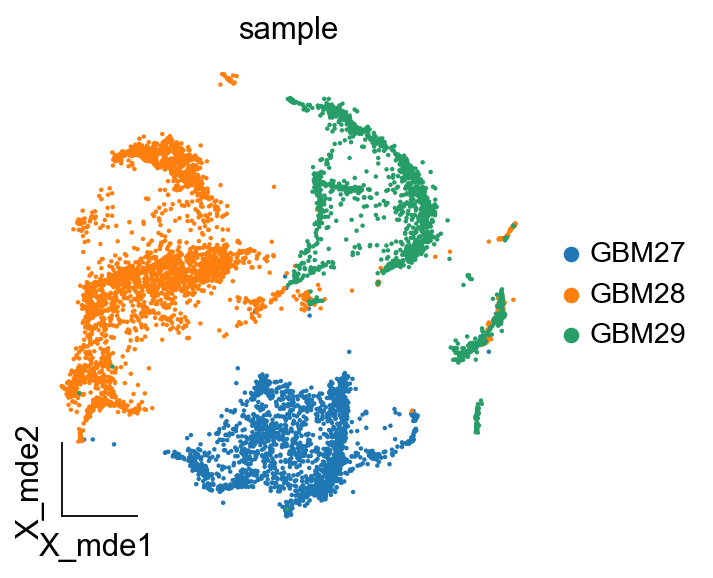

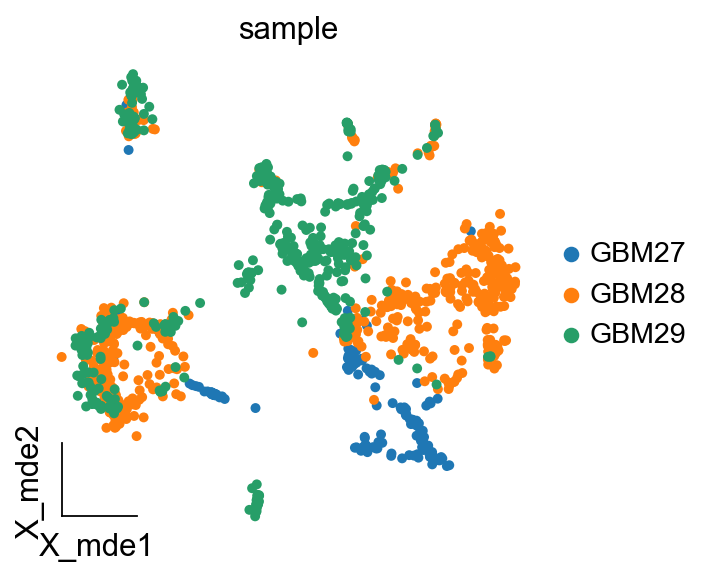

In [6]:
print(SC)
print(TE)
ov.utils.embedding(SC,
                   basis='X_mde',
                    frameon='small',
                   color=['sample'])
ov.utils.embedding(TE,
                   basis='X_mde',
                    frameon='small',
                   color=['sample'])

In [7]:
SC_harmony=ov.single.batch_correction(SC,batch_key='sample',methods='harmony',n_pcs=50)
SC
TE_harmony=ov.single.batch_correction(TE,batch_key='sample',methods='harmony',n_pcs=50)
TE

...Begin using harmony to correct batch effect


2024-12-12 11:27:21,962 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-12-12 11:27:24,275 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-12-12 11:27:24,345 - harmonypy - INFO - Iteration 1 of 10
2024-12-12 11:27:26,109 - harmonypy - INFO - Iteration 2 of 10
2024-12-12 11:27:27,880 - harmonypy - INFO - Converged after 2 iterations
2024-12-12 11:27:27,947 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


...Begin using harmony to correct batch effect


2024-12-12 11:27:28,979 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-12-12 11:27:28,986 - harmonypy - INFO - Iteration 1 of 10
2024-12-12 11:27:29,152 - harmonypy - INFO - Iteration 2 of 10
2024-12-12 11:27:29,278 - harmonypy - INFO - Iteration 3 of 10
2024-12-12 11:27:29,404 - harmonypy - INFO - Iteration 4 of 10
2024-12-12 11:27:29,531 - harmonypy - INFO - Iteration 5 of 10
2024-12-12 11:27:29,590 - harmonypy - INFO - Converged after 5 iterations


AnnData object with n_obs × n_vars = 1508 × 2000
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_scores', 'predicted_doublets', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'sample_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_mde', 'X_harmony'
    varm: 'PCs', 'scaled|original|pca_loadings

In [ ]:
def embding(adata):
    #scale the adata.X
    ov.pp.scale(adata)
    #Dimensionality Reduction
    ov.pp.pca(adata,layer='scaled',n_pcs=50)
    adata.obsm["X_mde_harmony"] = ov.utils.mde(adata.obsm["X_harmony"])
    return adata
SC = embding(SC)
TE = embding(TE)


<AxesSubplot: title={'center': 'sample'}, xlabel='X_mde_harmony1', ylabel='X_mde_harmony2'>

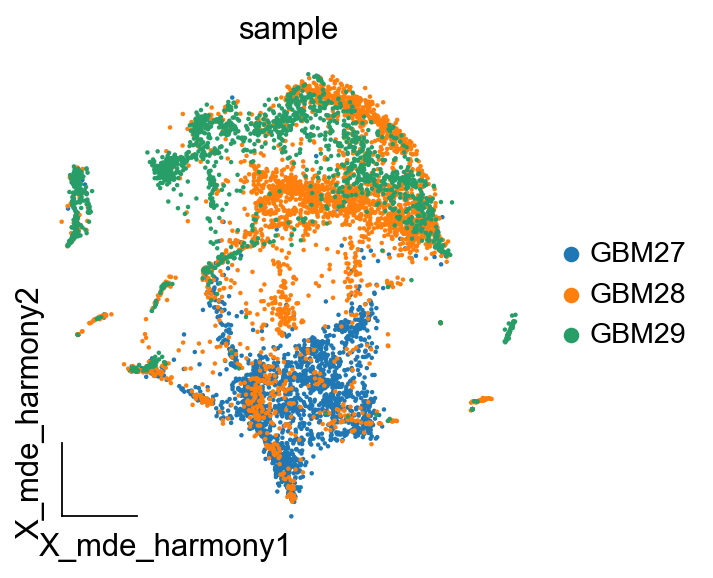

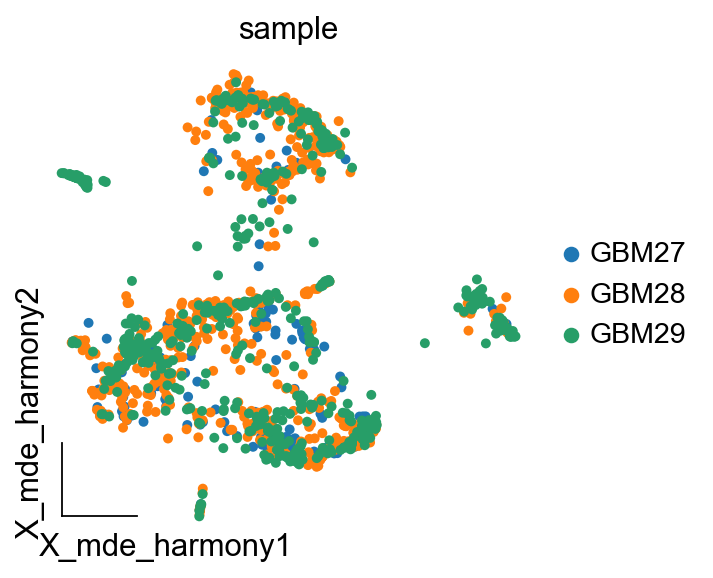

In [24]:
ov.utils.embedding(SC,
                basis='X_mde_harmony',frameon='small',
                color=["sample"],show=False)
ov.utils.embedding(TE,
                basis='X_mde_harmony',frameon='small',
                color=["sample"],show=False)

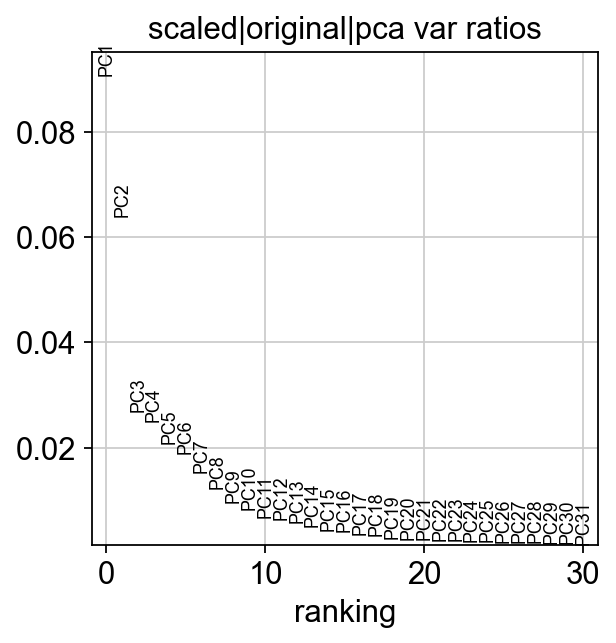

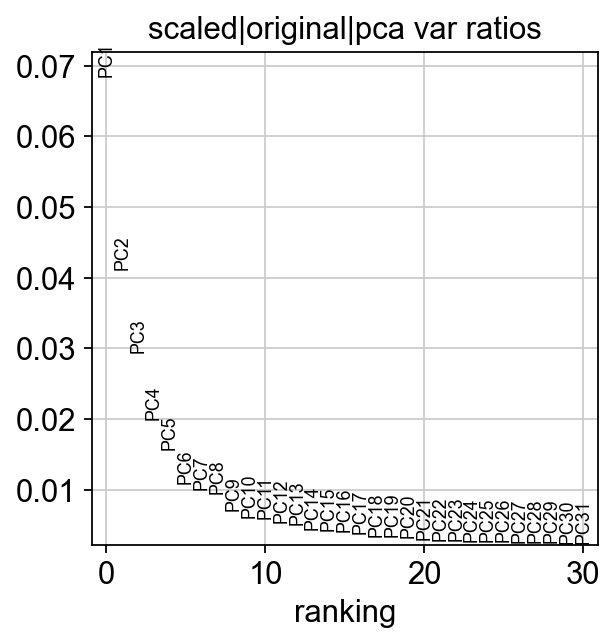

In [25]:
ov.utils.plot_pca_variance_ratio(SC)
ov.utils.plot_pca_variance_ratio(TE)

In [26]:
def cluster(adata):
    sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
                use_rep='scaled|original|X_pca')
    ov.utils.cluster(adata,method='leiden',resolution=1)
    return adata
SC = cluster(SC)
TE = cluster(TE)
print(SC)
print(TE)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
AnnData object with n_obs × n_vars = 7366 × 2000
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_tota

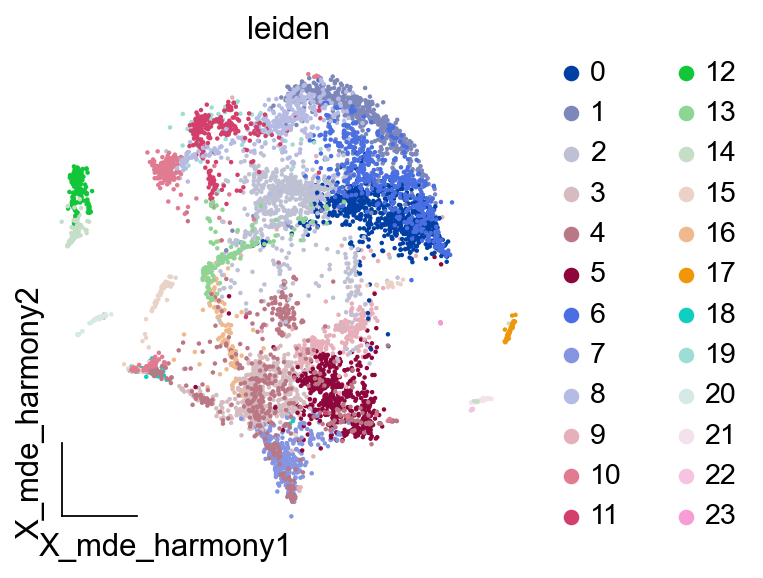

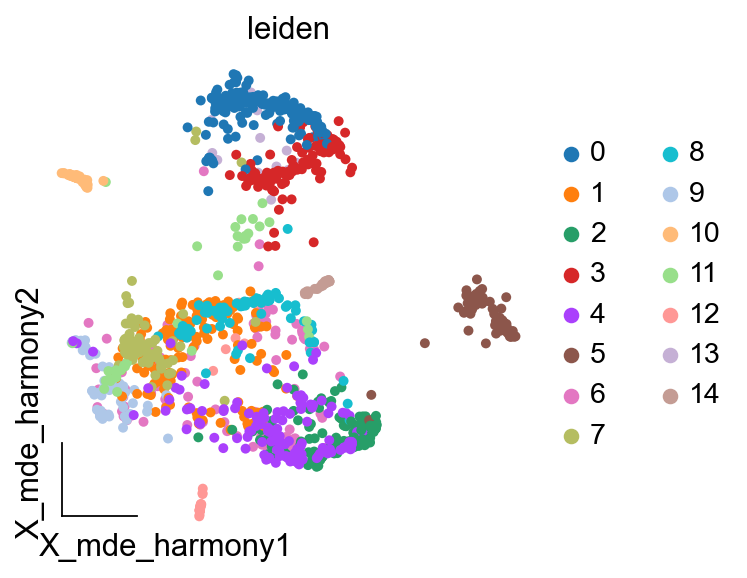

In [31]:
ov.utils.embedding(SC,basis='X_mde_harmony',
                   color=['leiden'],
                   frameon='small',wspace=0.5)
ov.utils.embedding(TE,basis='X_mde_harmony',
                   color=['leiden'],
                   frameon='small',wspace=0.5)